Cílem tohoto projektu bylo načtení příkladu z fotky/obrázku, následné zpracování aby bylo možné rozpoznání jednotlivých číslic a následné vypočtení předloženého příladu

V aktuálním stavu je možno rozpoznat a vypočítat příklady o jednociferných číslicích a se znaménky "+" a "-"

Načtení jednotlivých knihoven

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import csv
import cv2
import numpy as np
import os
from PIL import Image
import random
from google.colab import drive
from google.colab import files

from numpy import ones, zeros
import scipy
import scipy.misc
import skimage
import skimage.data
from skimage.filters import threshold_otsu
from skimage.filters import gaussian as gaussian_filter
from skimage.morphology import label
from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation

from skimage.measure import regionprops
from skimage.color import label2rgb, gray2rgb
from skimage.io import imread, imsave
from matplotlib.pyplot import imshow, colorbar, subplots
import matplotlib.cm as cm

<ipython-input-1-d44539d3c29f>:26: DeprecationWarning: Please use `binary_closing` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation
<ipython-input-1-d44539d3c29f>:26: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation
<ipython-input-1-d44539d3c29f>:26: DeprecationWarning: Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_closing, binary_erosion, binary_opening, binary_dilation
<ipython-input-1-d44539d3c29f>:26: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is de

Připojení disku google pro načítání datasetu a testovací obrázků

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Načtení obrázku pro test rozpznání a vypočtení příklkadu z google disku
, obrázek je před rozpznáváním upraven a postupně se ve správném pořadí rozpoznávají jednotlivé číslice

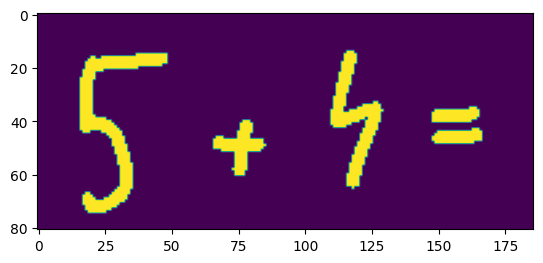

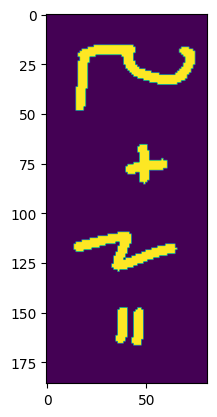

[0 1 2 3 4 5]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 

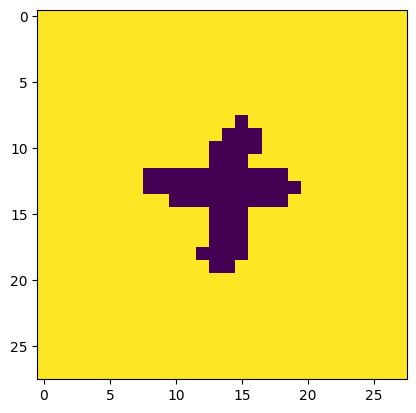

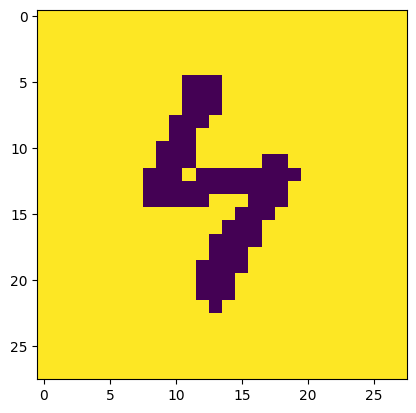

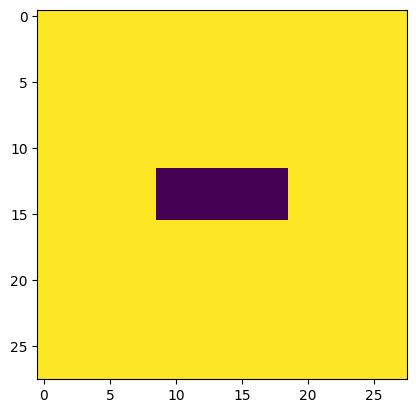

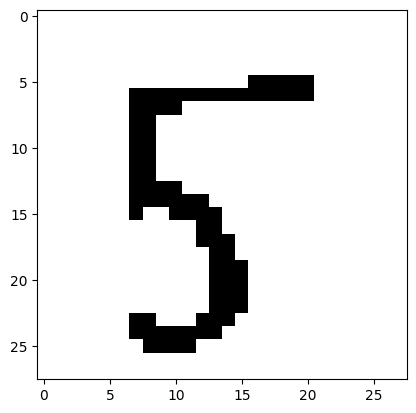

In [ ]:
img = imread('/content/drive/MyDrive/Projekt/TESTS/Test5.png', as_gray=True)
newimg = 1 - img
thr = threshold_otsu(newimg)
imthr = newimg > 0.0
imthr.resize()
plt.imshow(imthr)
plt.show()

# Transpose the binary image before labeling
imthr_transposed = np.transpose(imthr)
#newimthr = scipy.ndimage.binary_dilation(imthr_transposed, structure=None, iterations=3, mask=None, output=None, border_value=0, origin=0, brute_force=False)
#newimthr = scipy.ndimage.binary_erosion(imthr, structure=None, iterations=1, mask=None, output=None, border_value=0, origin=0, brute_force=False)
plt.imshow(imthr_transposed)
plt.show()

# Transpose the labeled image again after labeling to get back to the original orientation
imlabel = label(imthr_transposed, background=0)
print(np.unique(imlabel))
img = []
for i in range(len(np.unique(imlabel))-1):
  i = i+1
  part_img = np.transpose(imlabel == i)
  #img_erosion = scipy.ndimage.binary_erosion(part_img, structure=None, iterations=3, mask=None, output=None, border_value=0, origin=0, brute_force=False)
  contours, _ = cv2.findContours(part_img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  x, y, w, h = cv2.boundingRect(contours[0])
  x -= 15
  y -= 15
  w += 30
  h += 30

  # Ensure bounding box is within image boundaries
  x = max(x, 0)
  y = max(y, 0)
  w = min(w, part_img.shape[1])
  h = min(h, part_img.shape[0])

  cropped_img = part_img[y:y+h, x:x+w]
  inverted_img = ~cropped_img

  rescaled_img = cv2.resize(inverted_img.astype(np.uint8), (28, 28))
  img.append(rescaled_img)

print(img[0])
print(img[0].shape)
plt.imshow(img[1])
plt.show()
plt.imshow(img[2])
plt.show()
plt.imshow(img[3])
plt.show()
img_rev = 1 - img[0]
plt.imshow(img_rev, cmap=plt.cm.binary)
plt.show()
img.pop()
img.pop()
img_np = np.array(img)

Metoda pro správené načítání dat z vytvořeného csv souboru

In [ ]:
def load_data(dataset):
    with open(dataset, 'r', newline='') as file:
            reader = csv.reader(file)
            rows = list(reader)
            x = []
            y = []
            for i in range(len(rows)):
                y_np = np.array(rows[i][0])
                y.append(y_np)

                x_np = np.array(rows[i][1:])
                reshaped_x = x_np.reshape((28, 28))
                x.append(reshaped_x)

            x = np.array(x)
            y = np.array(y)
            x_int= np.array(x, dtype=int)
            y_int= np.array(y, dtype=int)
            return x_int, y_int

In [ ]:
#y_train .....
#10 = '+'
#11 = '-'

Načtení předpřipraveného datasetu z csv souboru do trénovací a testující množiny dat

In [ ]:
data_train = '/content/drive/MyDrive/Projekt/math_train.csv'
data_test = '/content/drive/MyDrive/Projekt/math_test.csv'
(x_train, y_train) = load_data(data_train)
(x_test, y_test) = load_data(data_test)

Tisknutí velikosti a tvaru trénovacích a testovacích dat

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (145000, 28, 28)
y_train: (145000,)
x_test: (12384, 28, 28)
y_test: (12384,)


Uložení rozměrů obrázků pro pozdější přeškálování dat

In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


Formát trénovacích dat

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,255,255,255,255,255,255,255,255,255,249,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,254,248,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,252,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,252,255,...,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,253,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,249,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
9,255,255,255,255,255,255,255,255,252,255,...,255,255,255,255,255,255,255,255,255,255


Ukázka trenovacích dat

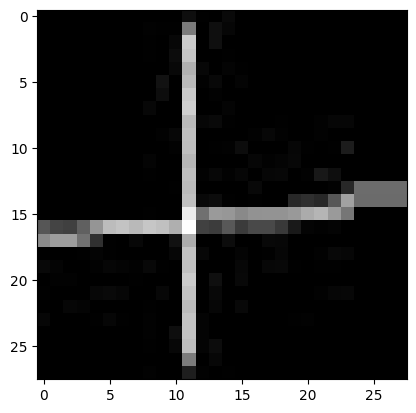

In [ ]:
plt.imshow(x_train[15], cmap=plt.cm.binary)
plt.show()

Více obrázků i s jejich správným určením

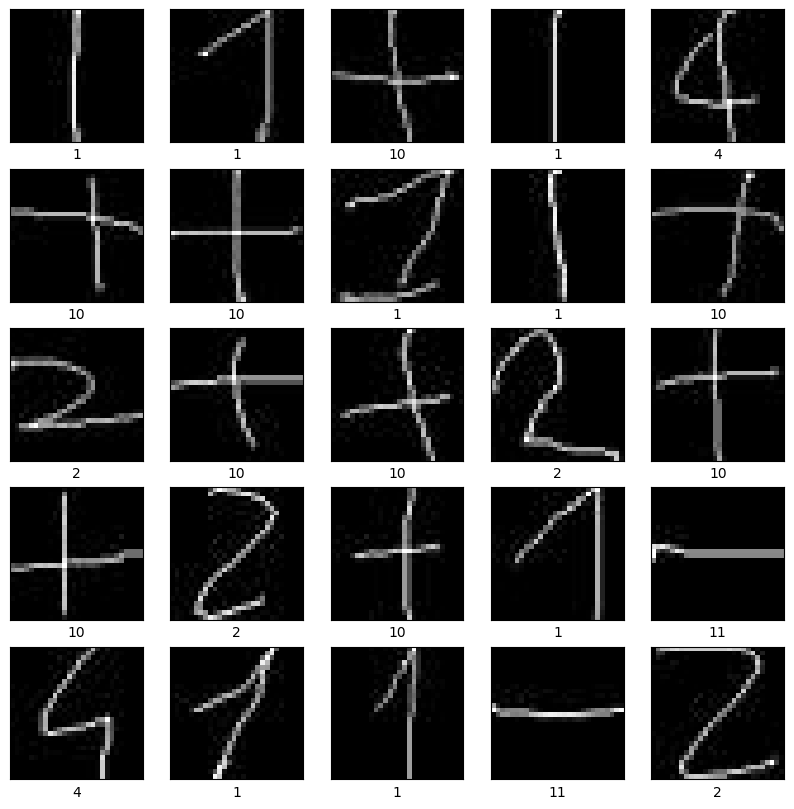

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Přeškálovaní dat do formátu, který se bude dávat do modelu pro trénování

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

Kontrola přeškálování

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)


x_train_with_chanels: (145000, 28, 28, 1)
x_test_with_chanels: (12384, 28, 28, 1)


Vytvoření normalizovaných dat s hodnotami od 0 do 1

In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255
print('x_test_with_chanels:', x_train_normalized.shape)
print(x_train_normalized[0])

x_test_with_chanels: (145000, 28, 28, 1)
[[[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.97647059]
  [1.        ]
  [0.94117647]
  [1.        ]
  [0.63921569]
  [0.37254902]
  [0.96470588]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.99607843]
  [0.97254902]
  [1.        ]
  [0.96862745]
  [1.        ]
  [0.69411765]
  [0.52156863]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.     

Vytvoření modelu pro rozpoznávání, stejný model, který se používá k rozpoznávání mnist datasetu, upravená poslední vrstva pro více výstupů

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=12,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Přehled modelu

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Grafický přehled o modelu

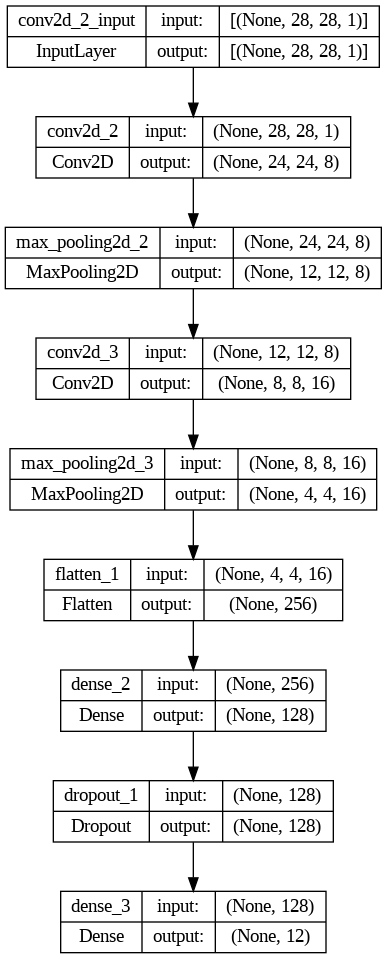

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Trénování modelu

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
4532/4532 [==============================] - 83s 18ms/step - loss: 0.3029 - accuracy: 0.9121 - val_loss: 0.0926 - val_accuracy: 0.9742
Epoch 2/10
4532/4532 [==============================] - 80s 18ms/step - loss: 0.0852 - accuracy: 0.9758 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 3/10
4532/4532 [==============================] - 82s 18ms/step - loss: 0.0602 - accuracy: 0.9829 - val_loss: 0.0411 - val_accuracy: 0.9897
Epoch 4/10
4532/4532 [==============================] - 89s 20ms/step - loss: 0.0462 - accuracy: 0.9869 - val_loss: 0.0419 - val_accuracy: 0.9899
Epoch 5/10
4532/4532 [==============================] - 82s 18ms/step - loss: 0.0400 - accuracy: 0.9886 - val_loss: 0.0303 - val_accuracy: 0.9919
Epoch 6/10
4532/4532 [==============================] - 80s 18ms/step - loss: 0.0337 - accuracy: 0.9901 - val_loss: 0.0332 - val_accuracy: 0.9913
Epoch 7/10
4532/4532 [==============================] - 84s 18ms/step - loss: 0.0300 - accuracy: 0.9916 - val_loss: 0.0373 -

Statistika pro Loss

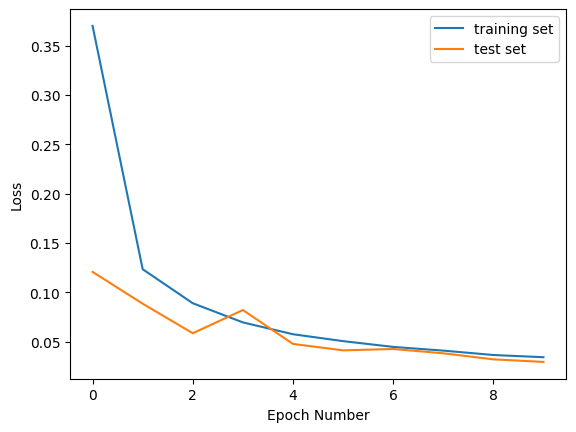

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

Statistika pro Accuracy

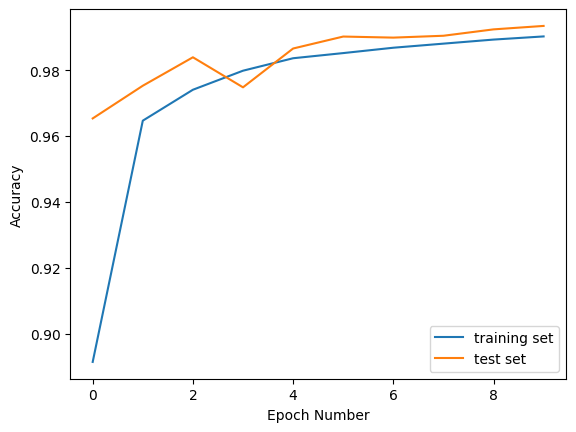

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

Vypočtení a zobrazení finální accuracy a loss pro trénovací množinu

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.012856240384280682
Training accuracy:  0.996448278427124


Vypočtení a zobrazení finální accuracy a loss pro validační množinu

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.029389899224042892
Validation accuracy:  0.9934592843055725


Uložení modelu

In [ ]:
model_name = 'math_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Opětovné načtení modelu

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

Vytvoření odhadů pro testovací data

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

387/387 [==============================] - 3s 6ms/step


Zobrazení tvaru odhadů pro testovací data

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (12384, 12)


Tabulka odhadů

In [ ]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.475628e-07,1.672576e-09,4.295259e-05,7.744860e-05,7.733126e-14,1.440897e-09,2.801347e-13,9.004763e-11,9.998794e-01,1.271969e-11,4.098469e-19,3.409504e-17
1,8.636616e-14,8.917362e-08,2.970469e-06,1.229282e-13,1.153991e-10,4.715718e-13,8.007135e-14,4.070267e-14,4.757369e-19,2.615627e-20,9.009175e-10,9.999968e-01
2,1.087031e-15,9.397064e-13,9.999999e-01,1.038196e-12,1.431030e-15,1.238690e-15,3.530340e-23,2.228439e-12,1.444412e-15,6.988047e-25,3.656921e-11,9.549747e-09
3,2.984161e-03,3.877300e-02,1.425221e-03,1.556090e-05,2.115444e-06,1.758014e-07,1.356576e-09,9.565284e-01,1.032552e-06,2.693420e-04,2.351397e-07,8.142940e-07
4,4.063550e-15,1.921784e-16,9.999992e-01,1.395139e-07,1.643862e-19,9.308536e-18,5.773116e-21,5.219409e-07,1.922835e-14,1.122402e-20,6.046443e-11,3.955252e-09
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,9.999743e-01,2.596718e-13,2.563336e-05,1.315546e-13,1.877955e-11,2.732333e-13,2.754421e-23,3.563239e-13,1.160575e-11,4.518636e-15,1.548274e-18,4.729940e-18
12380,3.300288e-08,9.999982e-01,2.442908e-10,2.395292e-10,1.731239e-08,1.689629e-12,5.795220e-13,5.193527e-08,1.193352e-10,2.955433e-07,1.467051e-06,3.340622e-09
12381,8.875272e-02,3.151694e-04,1.874252e-04,6.317241e-05,8.694140e-01,4.595904e-04,1.050544e-02,2.464717e-04,6.681500e-03,2.240604e-02,5.256915e-04,4.427016e-04
12382,2.082879e-09,9.832227e-08,3.868295e-06,9.999908e-01,2.106998e-15,2.699342e-07,1.529435e-11,3.935632e-08,4.620626e-06,4.334283e-07,1.359353e-15,9.268216e-12


Zaokrouhlená tabulka odhadů

In [ ]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,8
1,11
2,2
3,7
4,2
...,...
12379,0
12380,1
12381,4
12382,3


Zkouška, zda je odhad správný pro jeden případ

In [ ]:
print(predictions[0])

8


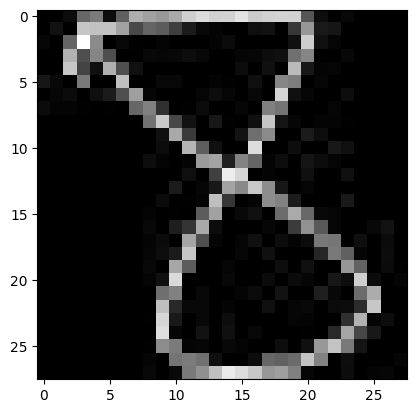

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

Test pro 196 případů

<ipython-input-33-ea5c5cf24195>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


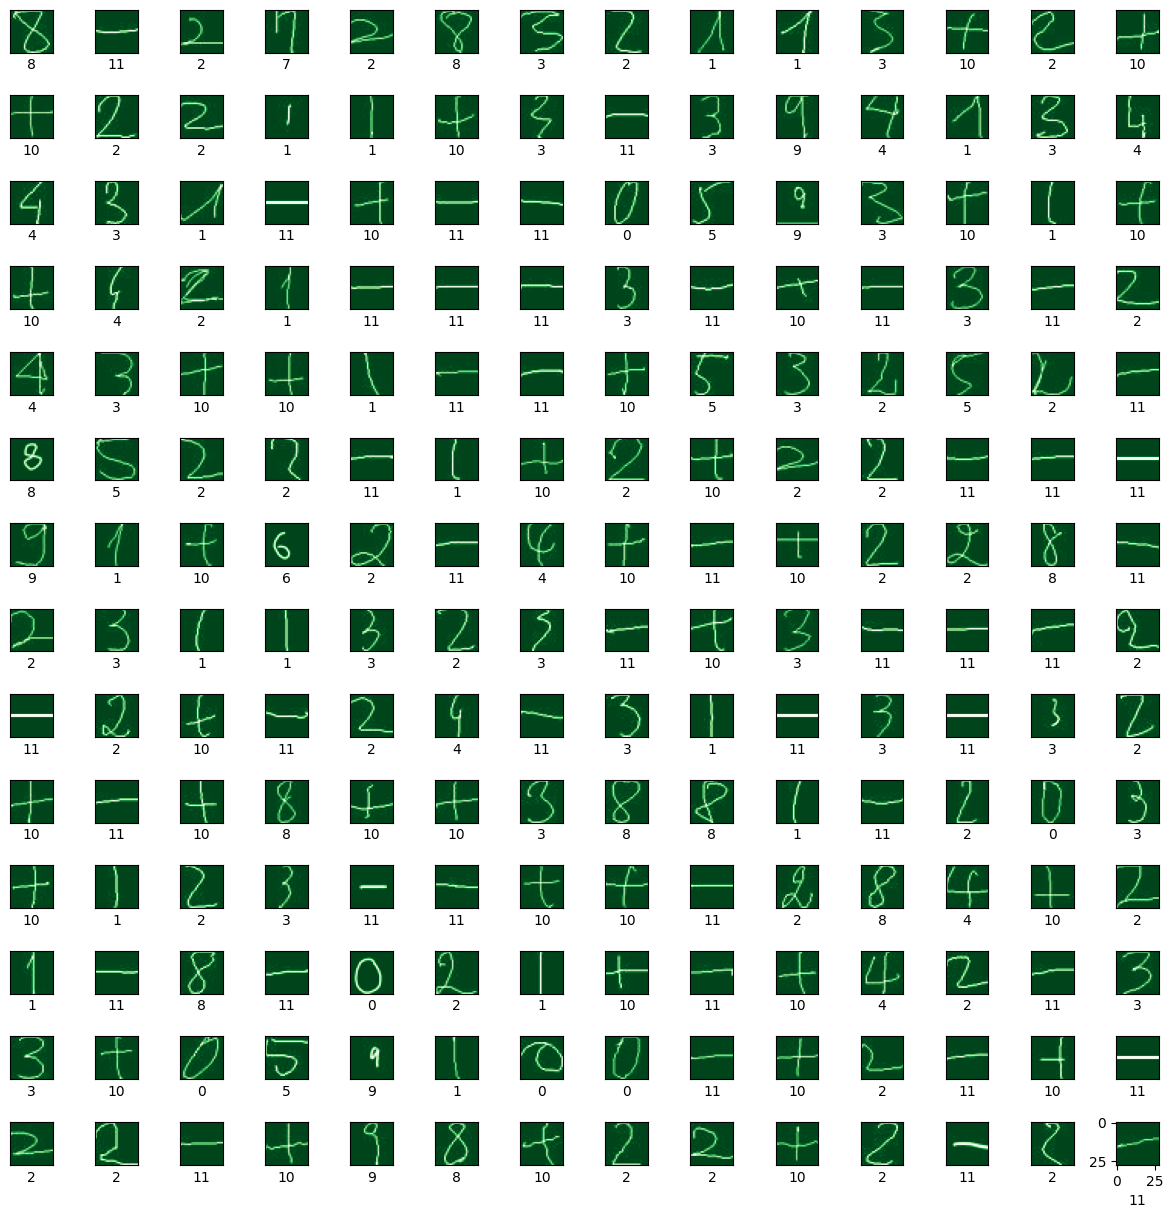

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Vytvoření confusion matice, pro zobrazení, v kterých případech model nejvíce chybuje

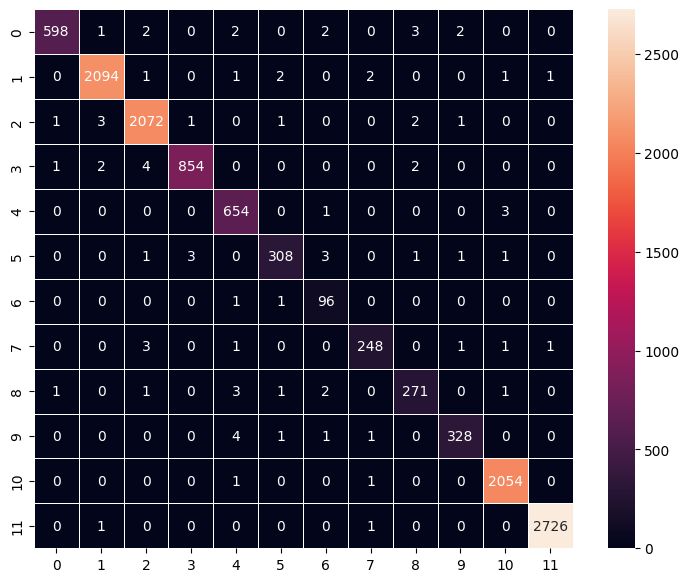

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Načtení jednotlivých číslic z testovacího příkladu do modelu a jejich odhad

1/1 [==============================] - 0s 23ms/step


<ipython-input-43-4809f9978b8e>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


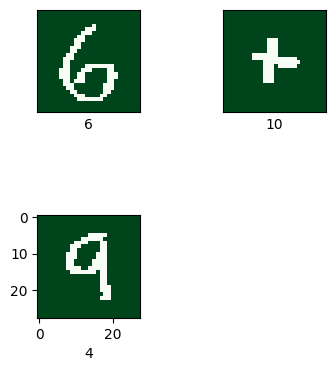

In [ ]:
img_proces = img_np.reshape(
    img_np.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
predict_test = loaded_model.predict([img_proces])
pd.DataFrame(predict_test)
predictions = np.argmax(predict_test, axis=1)
pd.DataFrame(predictions)
numbers_to_display = len(predictions)
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(4, 4))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(img_proces[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Převedení napsaného příkladu do "klasické počítačové verze"

In [ ]:
result = predictions[0]
if predictions[0] == 11:
  result = -result
str_parts = [str(result)]

for i in range(len(predictions)):
    if predictions[i] == 10:
        result = result + predictions[i+1]
        str_parts.append(" + " + str(predictions[i+1]))
    elif predictions[i] == 11:
        result = result - predictions[i+1]
        str_parts.append(" - " + str(predictions[i+1]))

str_parts.append(" = " + str(result))
str_result = ''.join(str_parts)

print(str_result)


7 + 3 = 10
